# Monte Carlo Methods

This tutorial will introduce you to Monte Carlo Methods.
> _&quot;Monte Carlo methods&quot; is a term covering pretty much any use of pseudo-randomness to help solve any kind of problem._ -- Niall O&#39;Higgins

Author: Sheila Kannappan
Last Modified: June 2021

## Setup

If you're looking at this notebook, you've presumably already followed these instructions. Please take a moment to complete any that you have not yet finished.

 * go to https://jupyter.org/try
 * click "Try JupyterLab"
 * open a terminal in the Lab (File>New>Terminal)
 * paste the following into the terminal to get the jupyter notebook:<br/>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/MonteCarloMethods.ipynb?token=ACPDL67MPAJGQB5LA7NJSILAYFFJU -O /home/jovyan/demo/MonteCarloMethods.ipynb`
 * paste all of the following into the terminal to get the individual python codes:<br/>
 `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partI_2.py.solns?token=AHJ5VUEH4JT3PB56J6ZQDQTAYOYY4 -O /home/jovyan/demo/partI_2.py.solns` <br>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partI_3.py.solns?token=AHJ5VUB35OLLOMRXFRMGI6LAYOYZ6 -O /home/jovyan/demo/partI_3.py.solns` <br>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partI_4.py.solns?token=AHJ5VUAKPLYV6LAAKWXH26DAYOY3G -O /home/jovyan/demo/partI_4.py.solns` <br>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partII_2.py.solns?token=AHJ5VUB4M3EFHITU7CVWQETAYOYVO -O /home/jovyan/demo/partII_2.py.solns` <br>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partIII_1.py.solns?token=AHJ5VUA73I6SRUKLJOKQJCTAYOYSC -O /home/jovyan/demo/partIII_1.py.solns` <br>
  `wget https://raw.githubusercontent.com/capprogram/2021bootcamp/master/montecarlomethods/partIII_2.py.solns?token=AHJ5VUHEIHCFK5N3R7G3LG3AYOYUM -O /home/jovyan/demo/partIII_2.py.solns` <br>
 * if necessary, click the refresh page (curled arrow) at the top of the webpage
 * launch the jupyter notebook by double clicking on it
 * you can run or re-run individual cells in the notebook by clicking on them and typing Ctrl-Enter
 * you can edit individual python codes outside the notebook by double clicking on them in the list of files on the left side of the jupyter lab window, then editing them in the window that pops up and saving with Ctrl-s

The .py files transferred above contain partial answers to the exercises below, left incomplete for you to finish. Select exercises have solutions as detailed below.

# I. Random Number Generators

There are two ways to generate random numbers:

- physical measurements that are expected to be random (e.g., coin flips)
- computational algorithms that produce long sequences of apparently random results, in fact completely determined by an initial &quot;seed&quot; value

The latter are often called _pseudo-random_ number generators.

Look over the description of the &quot;random&quot; package for python here: [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html)

Check out the Mersenne Twister on the internet -- it&#39;s not an amusement park ride!

**Exercise 1:** Use _random.random_ to generate a variable x consisting of 10 random numbers between 0 and 1. Repeat to create a second random variable y, and plot x and y against each other. Verify that there is no correlation.

NOTE: The command `plt.show()` is sometimes needed for plots to show up visibly; if you have properly updated Anaconda the default should be that you don't need it, but if no plots are appearing, try adding it to the end of your code.

Text(0, 0.5, 'y')

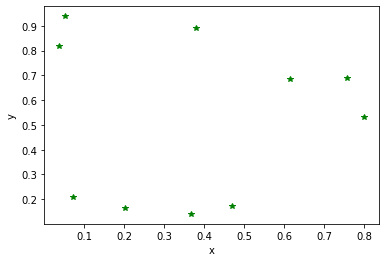

In [4]:
import random
import matplotlib.pyplot as plt

xx=[] # variable named xx to avoid single-letter variable name
yy=[]

for i in range(0,10):
   xx.append(random.random())

# insert code to get yy here

# uncomment the code below to make the plot
#plt.plot(xx,yy,'g*')
#plt.xlabel('x')
#plt.ylabel('y')

Notice that random.random samples from a _uniform_ distribution from 0 to 1 by default. <br>

**Exercise 2:** Now use the _random.seed_ command -- for example, `random.seed(555)` -- to control the random numbers in x and y such that they are identical. Plot x and y against each other and verify that there is now a perfect correlation.

Text(0, 0.5, 'y')

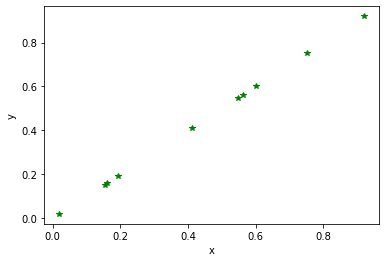

In [15]:
# copy code from previous code block as a starting point

The `append` command you have used up to now is a slow and inefficient way to build up a set of numbers. _Recall that the python package &quot;numpy&quot; enables array math._ For example, we could have computed `xx` like so: <br>

    import numpy.random as npr
    rngx = npr.default_rng()
    xx = rngx.uniform(size=10)

Visit the [numpy.random webpage](https://numpy.org/doc/stable/reference/random/index.html) to read about it a bit, then import numpy.random and use it to rewrite your code above. You can compare to the solutions in partI_2.py.solns.

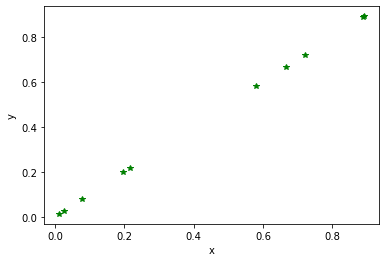

In [16]:
import matplotlib.pyplot as plt
import numpy.random as npr

#generate 10-element random xx and yy here

#plt.plot(xx,yy,'g*')
#plt.xlabel('x')
#plt.ylabel('y')

### Gaussian Random Numbers

The Gaussian or Normal distribution is the most commonly used model for random uncertainties (non-systematic errors/noise) in data. It has the form <img src="https://latex.codecogs.com/png.latex?\frac{1}{\sigma\sqrt{2\pi}}\exp{\left(-\frac{u^2}{2\sigma^2}&space;\right&space;)}" />

Graphically, this form looks like <br>
<img src="https://github.com/capprogram/2017bootcamp-general/raw/master/MonteCarloTutorial/gaussianconfidenceintervals.png"/>

We can use the Gaussian distribution to describe our confidence in a specific value (how much the value might vary, often expressed as a plus-or-minus error bar) or our confidence that a given detected signal is not just noise (how far the value rises above baseline noise):

1. The error bars on data values are typically set to equal the expected &plusmn;1&sigma; variations from random measurement errors or inherent noise _(caveat: some research fields use &plusmn;2&sigma; error bars)_. Different possible error bar ranges are referred to as &quot;confidence intervals.&quot;. From the diagram, &plusmn;1&sigma; corresponds to a &quot;68% confidence interval.&quot;.

2. The signal-to-noise (S/N) ratios for data values representing &quot;detections&quot; are typically given in terms of the background noise (i.e., S/N=3 means S=3&sigma; (caveat: if the signal is extended in time/space/&lambda;/etc., it is really a sum of several data points and you must use error propagation rules). From the diagram, we see a S/N&gt;3 "detection" has only 0.1% probability of occurring by chance, so people generally say a measurement at S/N=3 is detected &quot;at 99.9% confidence.&quot; (Strictly speaking this language is misleading; see reading on the p-value crisis in the Boot Camp wiki.)

**Exercise 3:** Use the _normal_ (as opposed to _uniform_) method of `npr.default_range` to generate a variable u (u for &quot;uncertainty&quot;) consisting of 1000 random numbers with mean zero and standard deviation &sigma; = 1. Create a histogram of the values to verify that they look like a Gaussian distribution. Compute the functional form of the Gaussian and overplot it to see how well it matches.

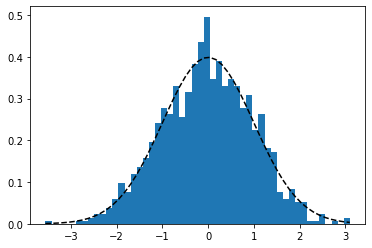

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr

mean, sigma = 0., 1.
rngu = npr.default_rng()
#uu = rngu.normal(???) # look up the correct syntax in the numpy.random.default_rng documentation

# plot histogram
# histogram plotting methods taken from http://matplotlib.org
#n1, bins1, patches1 = plt.hist(uu,bins=50,density=True,histtype='stepfilled')
#plt.setp(patches1,'facecolor','g','alpha',0.75) # optional if you wish to change histogram appearance

# overplot expected Gaussian distribution on top of histogram using bins1 as u values-- you will need np.exp and np.sqrt
#gaussfunct=??  # fill in using equation where input values are histogram bin locations "bins1"
#plt.plot(bins1,gaussfunct,'k--',linewidth=1.5)

You can compare to the solutions in partI_3.py.solns.

**Exercise 4:** Use `numpy.where` to determine what percentage of the time the variable u lies inside &plusmn;1&sigma; or &plusmn;2&sigma;. If you plot a set of data points with error bars equal to u, how often should a line you fit to the data actually go through the error bars of a given point (assuming the model is correct)?

In [18]:
# starting with uu from previous cell, generated with sigma = 1
limval= 1. # set to 1 or 2
#fractinrange = ???/np.size(uu) # denominator is total number of uu values, what should numerator be?
#print(fractinrange)

0.674


You can compare to the solutions in partI_4.py.solns.

If the model is correct and the error bars represent 68% confidence intervals (&plusmn;1&sigma;), then for a given point, the probability of the line going through the error bars is 68%.  You can tell by eye that something is wrong (bad model, too large/small error bars, etc.) if the fitted line goes through many more or fewer than 68% of the data points' error bars. (Caveat: very rarely, &plusmn;2&sigma; error bars may be shown.)

## II. Areas or Volumes of Enclosed Regions

A basic application of random number generation is in measuring the areas or volumes of enclosed regions, especially non-rectangular regions for which a direct measurement would be difficult. The method is to choose points randomly in a rectangular region enclosing the region of interest, then find the fraction of the points that land inside the region of interest in order to assess its subarea/subvolume.

**Exercise 1:** Use _random.uniform_ to measure the area of a circle with radius 1 and thus to measure the value of &pi;. How many darts do you need to get a good, consistent estimate?

In [35]:
# study and run the code in this cell to complete exercise 1
# (adapted from http://niallohiggins.com/2007/07/05/monte-carlo-simulation-in-python-1/)

import random # not using numpy for simplicity

DARTS=1000
hits = 0
throws = 0
for i in range (0, DARTS):
    throws += 1
    xx = random.uniform(-1,1) # square box circumscribes circle with radius 1
    yy = random.uniform(-1,1)
    distsquared = xx**2 + yy**2 # taking the square root here would slow down the code
    if distsquared <= 1.0:
        hits = hits + 1.0

# hits / throws = area of circle / area of square = Pi 1^2 / 2^2
estpi = 4 * (hits / throws)

print("pi = %s" % estpi)

pi = 3.1484


**Exercise 2:** Use numpy&#39;s array version of random to measure the area under a Gaussian from -1&sigma; to +1&sigma;. Think about why this area is equal to the percentage of u values between &plusmn;1&sigma;.

In [44]:
# modify the code in this cell to complete exercise 2
# hint: you can get the equation for a Gaussian from part I, exercise 3

import numpy as np
import numpy.random as npr

sigma=1.
throws=100 # play with this number -- how many darts are enough?

# throw darts in a box circumscribing the portion of the Gaussian that is of interest

# width is from -sigma to +sigma
rngx = npr.default_rng()
xvals=(rngx.uniform(size=throws) * 2.*sigma - 1.*sigma) # what is the range of xvals if uniform goes from 0 to 1?

# height is from 0 to peak value of Gaussian
rngy = npr.default_rng()
#yvals=(rngy.uniform(size=throws) * ??? # how should you renormalize uniform so 0 to 1 maps to 0 to peak?

# determine the boundary of the desired region as a function of x values
#gaussfunct=??? fill in as a function of xvals

# count the number of hits
#hits=np.size(np.where(yvals <= gaussfunct))

# compute area = (hits/throws) * rectangle area
#rectarea = ??? # fill in based on width and height determined above
#area = (hits/throws)*rectarea

#print("area is %s" % area)

area is 0.7180964079976867


You can compare to the solutions in partII_2.py.solns.

## III. Random Selection from a Non-Uniform Distribution

It may happen that you want to select random numbers from a distribution of your own. For example, suppose we want the distribution of radius values for a set of points drawn randomly from within a circle as shown below.

The probability of a point having a given radius increases with the area of the annulus that that radius lies in, so <img src="https://latex.codecogs.com/png.latex?\inline&space;p(r)dr=\frac{2\pi&space;rdr}{\pi&space;R^2}" />where R is the radius of the circle. (Note that the integral <img src="https://latex.codecogs.com/png.latex?\inline&space;\int_0^Rp(r)dr=1" /> as is required for a probability distribution.) The trick to computing the (non-uniform) probability distribution for _r_ is to map random values _x_ drawn from a uniform distribution [0, 1) onto values of _r_ in such a way that the correct frequency of r values is produced. A one-to-one mapping in which the _integrated_ probability out to _r_ in [0, R) is equal to the integrated probability out to _x_ in [0, 1) does the trick. In &quot;inverse transform sampling,&quot; we first generate values using a uniform random number generator, then map them to values drawn from another probability distribution using this type of integral mapping.

<img src="https://github.com/capprogram/2017bootcamp-general/raw/master/MonteCarloTutorial/randomdotsincircle.png"/>

**Exercise 1:** First, use the _uniform_ method of `numpy.random.default_rng` to select radii randomly in a circle with radius R=1 by inverse transform sampling. You will need to solve analytically for the radius within the circle r that yields a given value of the integral <img src="https://latex.codecogs.com/png.latex?\inline&space;\int_0^rp(r)dr" /><br>
Second, compare the distribution of radii selected by this method to the distribution of radii obtained by selecting &quot;hits&quot; in a circle as in Exercise 1 from Part II. (Note: this second task requires that you generate a new block of code, not just tweak the code provided. You should try to find bits of earlier code that you can copy/imitate/modify to make an array of radii, then plot the new radii in a histogram on top of the histogram from inverse transform sampling.)

In [2]:
# edit and run the code in this cell to complete exercise 1
import numpy.random as npr
import numpy as np
import matplotlib.pyplot as plt

# notes: radial probability distribution, its integral, and its reverse lookup
#### next 3 lines are pseudo-code, do not uncomment but use for reference
#### p_r=2.*3.14159*r / (3.14159*R**2)
#### intp_r=3.14159*r**2 / (3.14159*R**2)  =  r**2 for R=1
#### r_at_given_intp_r= ??? solve analytically to find r

# choose nran random numbers in uniform interval 0-1
nran = 1000
rngx = npr.default_rng()
xvals = rngx.uniform(size=nran)

# compute the integrated area under the uniform distribution p_u: integral from 0 to x of (p_u*dx) = integral(1*dx) = x
intp_uni = xvals # rename variable for clarity that we have done the integral

# solve for the radii that give the same integrated area under p_r as the randomly chosen xvals
intp_r = intp_uni # set desired integrated area equal to that from uniform distribution
#radvals = ??? # compute radii from intp_r using analytic solution you found above

# make a histogram
#n1, bins1, patches1 = plt.hist(radvals,bins=50,density=1,histtype='stepfilled')
#plt.setp(patches1,'facecolor','g','alpha',0.75)

# add code below to compare with radii chosen by throwing darts (see part II exercise 1 for a starting point)


You can compare to the solutions in partIII_1.py.solns.


**Exercise 2:** Use the _uniform_ method of `numpy.random.default_rng` to select values from a Gaussian distribution using inverse transform sampling. In this exercise you are essentially recreating the _normal_ method of `numpy.random.default_rng` (presumably with inferior optimization) -- the random number generator "under the hood" is always drawing from a uniform distribution. <br><br>
Hint: the integral of a Gaussian function that is centered on 0 over the range from -infinity to u is:

<img src="https://latex.codecogs.com/png.latex?\int_{-\infty}^u\frac{1}{\sigma\sqrt{2\pi}}\exp{\left(-\frac{u^2}{2\sigma^2}\right)}du=0.5+0.5&space;erf(u/\sqrt{2})" />

You can import &quot;erf&quot; (the error function) from scipy.special.

[None, None]

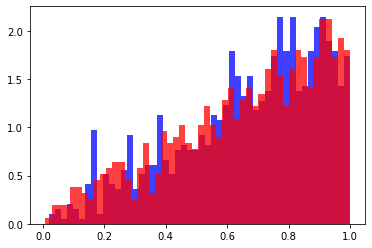

In [6]:
# edit and run the code in this cell to complete exercise 2

import numpy.random as npr
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt

# notes: probability distribution, its integral, and its reverse lookup
#### next 3 lines are pseudo-code, do not uncomment but use for reference
#### p_g=exp((-1.*u**2)/(2.*sigma**2))/(sigma*sqrt(2.*3.14159))
#### intp_g=0.5+0.5*erf(u/sqrt(2.))
#### u_at_given_intp_g= ??? can't solve analytically, must create lookup table

# choose nran random numbers in uniform interval 0-1
nran = 1000
rngx = npr.default_rng()
xvals = rngx.uniform(size=nran)

# the integral of uniform distribution p_u*dx (=1*dx) from 0 to x is just x
intp_uni = xvals # rename variable for clarity that we have done the integral

# solve for the u values that give the same integrated area under p_g as the randomly chosen xvals
#intp_g = intp_uni # set desired integrated area equal to that from uniform distribution
#lookupuvals = (np.array([range(0,10000)])-5000)/1000. 
#lookupintvals = ??? # fill in integral of p_g evaluated at lookupuvals
#uvals = np.zeros(nran) # creating uvals array with size equal to number of random values, =0 as placeholder
#for i in range(0,nran):
#    diffs = abs(lookupintvals-intp_g[i])
#    uvals[i] = lookupuvals[np.where(diffs == diffs.min())] # filling in each element of uvals with closest lookup value

# make a histogram
#n1, bins1, patches1 = plt.hist(uvals,bins=50,density=1,histtype='stepfilled')
#plt.setp(patches1,'facecolor','g','alpha',0.75)

You can compare to the solutions in partIII_2.py.solns.

## IV. For Further Inquiry

Random number generation is useful in many contexts. For example, you may wish to generate mock data sets with realistic scatter to test algorithms. Simulated data play an important role in planning and testing experiments.

[http://www.ligo.org/news/blind-injection.php](http://www.ligo.org/news/blind-injection.php)

Another technique that relies on Monte Carlo methods is &quot;bootstrapping,&quot; actually a family of techniques all of which use random resampling of a real data set to estimate the uncertainties on parameters or model fits characterizing that data set. We'll return to bootstrapping in another tutorial.

[http://en.wikipedia.org/wiki/Bootstrapping\_%28statistics%29](http://en.wikipedia.org/wiki/Bootstrapping_%28statistics%29)